In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# read in the data

df_GDP = pd.read_csv('./summary_GDP.csv', header=0) #change csv name
df_GTP = pd.read_csv('./summary_GTP.csv', header=0)

timepoints = df_GDP['Deut Time (sec)'].unique()
peptides_GDP = df_GDP['Sequence'].unique()
peptides_GTP = df_GTP['Sequence'].unique()

df_peptides_resnum = df_GDP[["Start","End","Sequence"]]
df_peptides_resnum = df_peptides_resnum.drop_duplicates()
peptide_resnums = {}
for index, row in df_peptides_resnum.iterrows():
    peptide_resnums[ row['Sequence'] ] = row['Start'], row['End']

peptides_both = set(peptides_GDP).intersection(peptides_GTP)
peptides_one = set(peptides_GDP).difference(peptides_GTP)

GSSAPAANGEVPTFKLVL
GTP_exchanged_list
[0.0, 5.465, 5.572, 5.896, 6.097]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VGDGGTGKTTFVKRHLTGEF
GTP_exchanged_list
[0.0, 2.484, 2.2569999999999997, 3.073, 2.8680000000000003, 2.891, 2.859]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


YQQEMEQATALPLPDEDDADL
GTP_exchanged_list
[0.0, 8.512, 8.261000000000001, 7.8389999999999995, 7.468999999999999, 7.909, 7.75]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


KLVL
GTP_exchanged_list
[0.0, 0.038, 0.044000000000000004, 0.027999999999999997, 0.111, 0.078, 0.059000000000000004]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NIPIVL
GTP_exchanged_list
[0.0, 0.092, 0.10099999999999999, 0.52, 0.733, 0.899, 0.818]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


FEKKYIAT
GTP_exchanged_list
[0.0, 3.062, 3.127, 2.991, 3.028, 3.114, 3.053]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


AKSNYNFEKPFL
GTP_exchanged_list
[0.0, 1.554, 1.71, 2.597, 3.0210000000000004, 3.275, 3.242]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ARKLAGNPQL
GTP_exchanged_list
[0.0, 1.732, 1.915, 2.734, 2.761, 3.168, 3.134]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


GSSAPAANGEVPTF
GTP_exchanged_list
[0.0, 5.078, 4.747, 4.939, 4.879, 5.186, 5.225]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VASPALAPPEVQ
GTP_exchanged_list
[0.0, 2.206, 2.7030000000000003, 2.748, 3.639, 4.338, 4.121]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


EKKYIAT
GTP_exchanged_list
[0.0, 2.886, 2.91, 2.737, 2.83, 2.923, 2.864]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VKRHLTGEFEKKYIAT
GTP_exchanged_list
[0.0, 5.807, 5.511, 6.154, 5.632999999999999, 5.874, 5.729]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VKRHLTGEF
GTP_exchanged_list
[0.0, 2.1630000000000003, 1.746, 1.8530000000000002, 2.7539999999999996, 2.42, 3.0460000000000003]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


DVWDTAGQEKFGGLRDGYY
GTP_exchanged_list
[0.0, 7.153, 7.09, 6.977, 6.869, 7.167999999999999, 6.867000000000001]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VEVHPLSF
GTP_exchanged_list
[0.0, 1.2329999999999999, 1.29, 1.3, 1.439, 1.423, 1.3980000000000001]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VLVGDGGTGKTTFVKRHLTGE
GTP_exchanged_list
[0.0, 1.954, 2.025, 2.28, 2.661, 2.7030000000000003, 2.495]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ARKLAGNPQLEF
GTP_exchanged_list
[0.0, 2.636, 2.8560000000000003, 3.855, 3.903, 4.159, 4.1419999999999995]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VLVGDGGTGKTTFVKRHLTGEF
GTP_exchanged_list
[0.0, 2.636, 2.69, 2.909, 3.258, 3.262, 3.13]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


DVWDTAGQEKFGGLRDGY
GTP_exchanged_list
[0.0, 6.742000000000001, 6.655, 6.6, 6.61, 6.978, 6.593999999999999]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


AIIM
GTP_exchanged_list
[0.0, 0.055, 0.047, 0.054000000000000006, 0.113, 0.059000000000000004, 0.048]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


DTAGQEKFGGLRDGYYINA
GTP_exchanged_list
[0.0, 8.882, 9.029, 8.876, 8.59, 8.948, 8.912]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-10-5b4ad9e4e187>:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


KSNYNFEKPFL
GTP_exchanged_list
[0.0, 1.445, 1.504, 2.225, 2.687, 2.8569999999999998, 2.8760000000000003]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VDEQL
GTP_exchanged_list
[0.0, 1.45, 1.527, 1.5019999999999998, 1.4169999999999998, 1.489, 1.423]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


DVWDTAGQEKFGGLRDGYYINAQ
GTP_exchanged_list
[0.0, 10.87, 10.669, 11.398, 11.263, 12.192, 12.147]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VHPLSF
GTP_exchanged_list
[0.0, 0.716, 0.831, 0.802, 0.736, 0.755, 0.804]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


GEIKFDVWDTAGQEKFGGLRDGY
GTP_exchanged_list
[0.0, 5.962999999999999, 5.996, 6.144, 6.256, 6.542999999999999, 6.194]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


DVWDTAGQEKFGGLRDGYYINA
GTP_exchanged_list
[0.0, 10.093, 10.054, 10.749, 10.338, 10.944, 10.73]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


EVHPLSF
GTP_exchanged_list
[0.0, 0.564, 0.6679999999999999, 0.7090000000000001, 0.7120000000000001, 0.72, 0.6890000000000001]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


YDISA
GTP_exchanged_list
[0.0, 0.124, -0.019, 0.022000000000000002, -0.004, 0.026000000000000002, -0.075]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ATALPLPDEDDADL
GTP_exchanged_list
[0.0, 4.65, 4.452, 4.17, 4.056, 4.274, 4.168]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


IGVEVHPLSF
GTP_exchanged_list
[0.0, 1.96, 2.242, 3.0239999999999996, 3.095, 3.2230000000000003, 3.2319999999999998]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


IGVEV
GTP_exchanged_list
[0.0, 0.14800000000000002, 0.11599999999999999, 0.132, 0.128, 0.147, 0.121]


/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


YDISAKSNY
GTP_exchanged_list
[0.0, 4.901, 0.889, 1.9069999999999998, 2.0709999999999997, 2.162, 2.121]


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

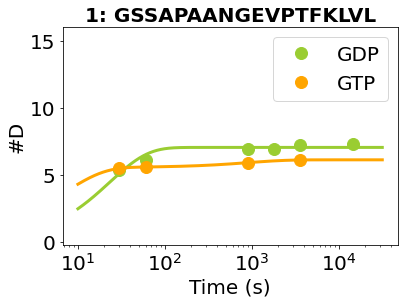

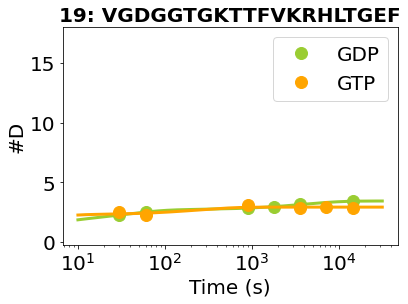

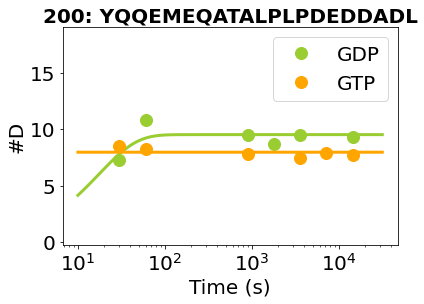

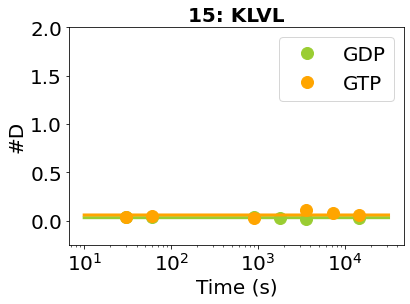

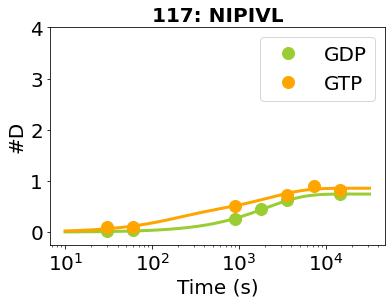

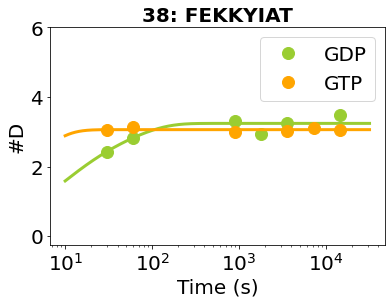

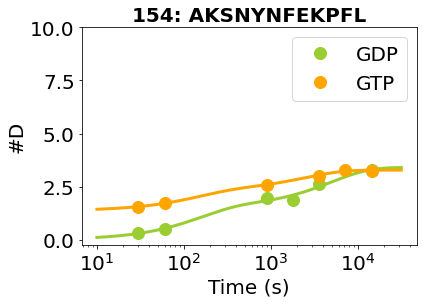

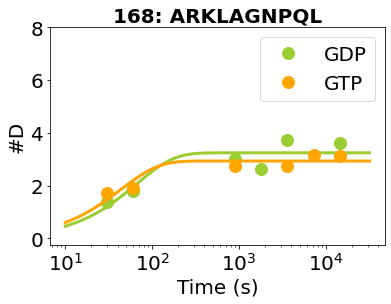

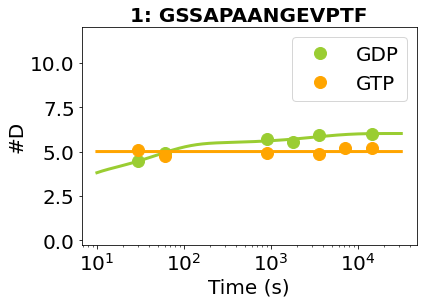

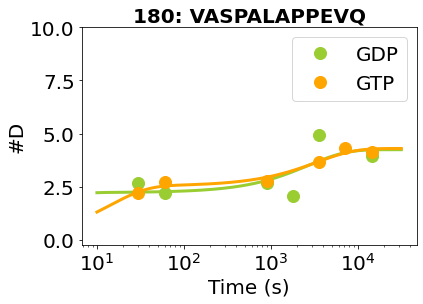

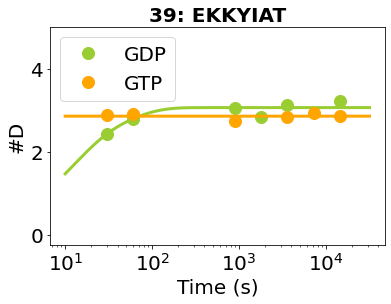

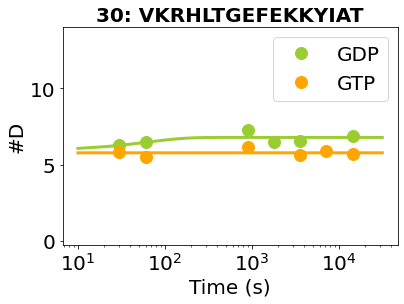

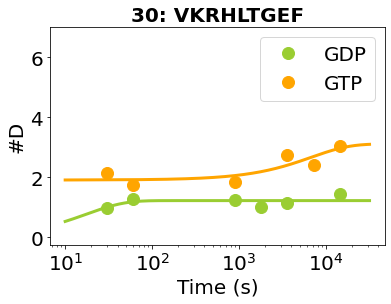

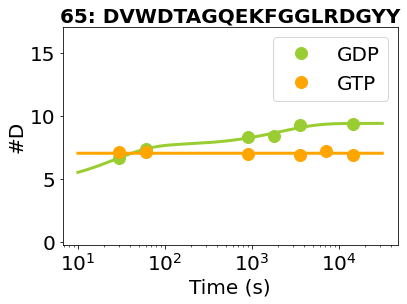

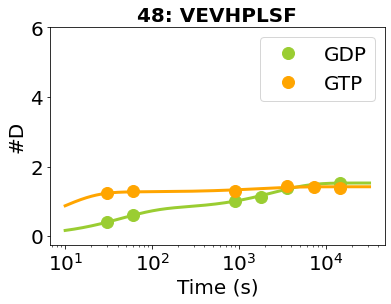

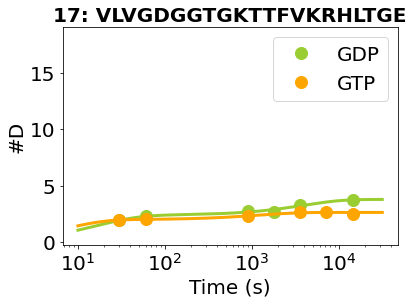

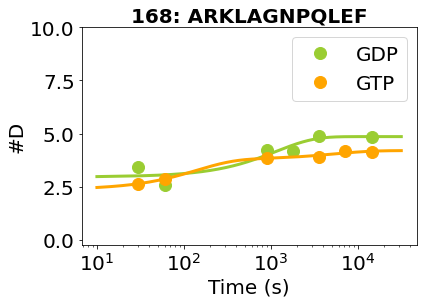

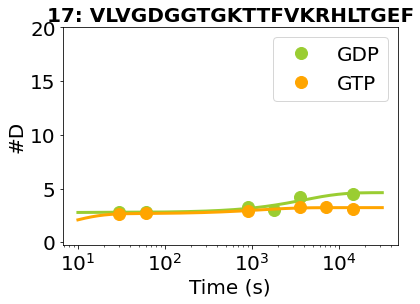

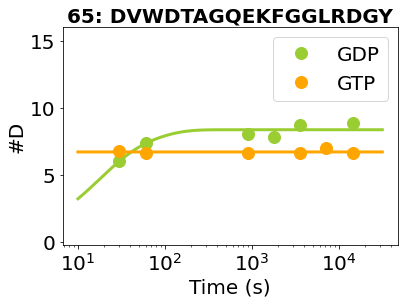

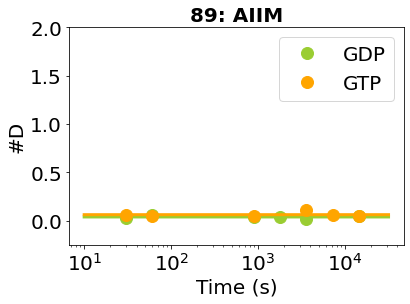

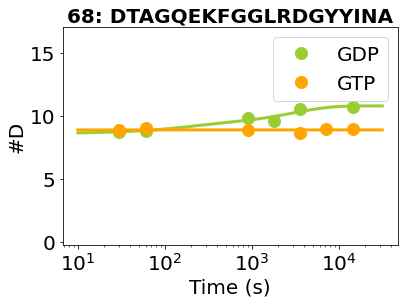

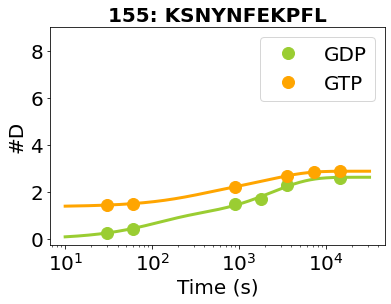

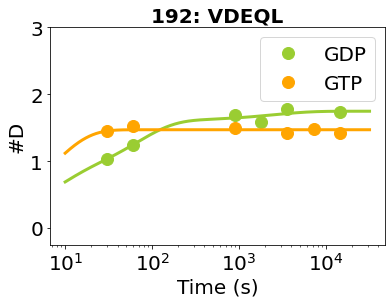

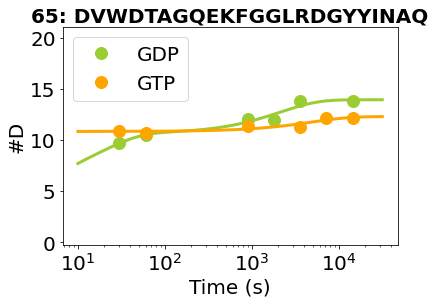

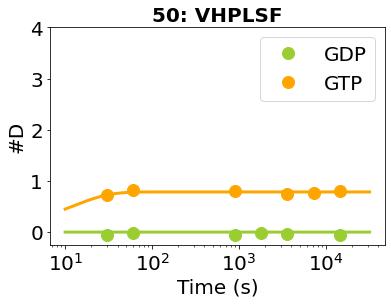

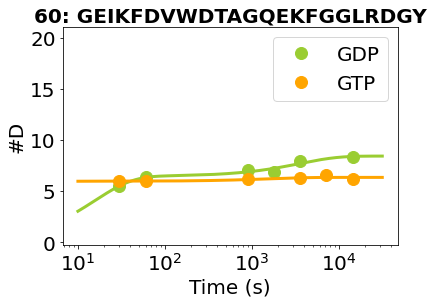

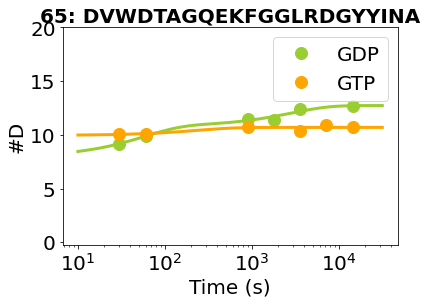

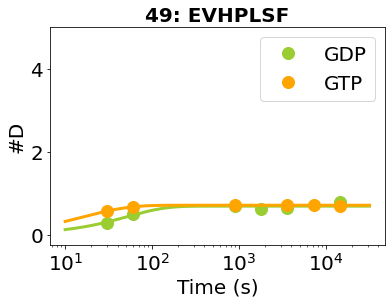

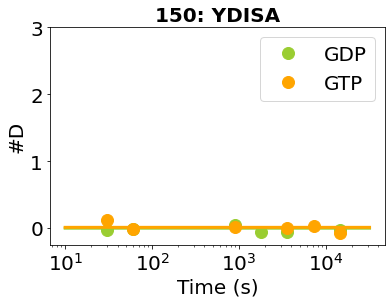

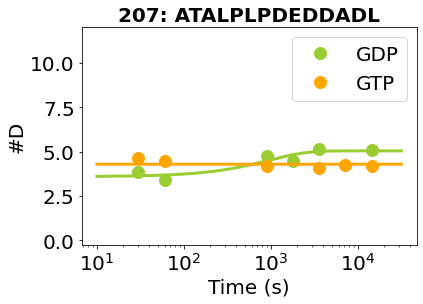

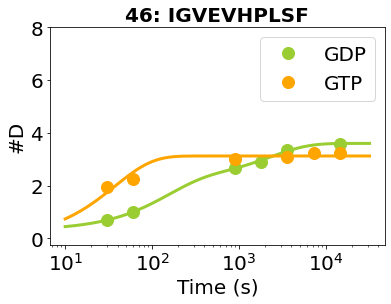

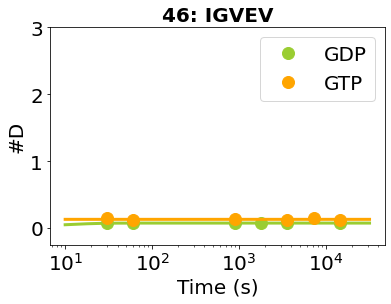

In [10]:
for peptide in peptides_both:
    GDP_exchanged = []
    GTP_exchanged = []
    max_protons = len(peptide)-2

    df_GDP_subset = df_GDP[["Sequence","Deut Time (sec)","#D"]]
    df_GTP_subset = df_GTP[["Sequence","Deut Time (sec)","#D"]]
    df_GDP_peptide = df_GDP_subset[df_GDP_subset["Sequence"] == peptide]
    df_GTP_peptide = df_GTP_subset[df_GTP_subset["Sequence"] == peptide]
        
    for timepoint in timepoints:
        df_GDP_tp = df_GDP_peptide[df_GDP_peptide["Deut Time (sec)"] == timepoint]
        GDP_exchanged.append(df_GDP_tp['#D'])
        df_GTP_tp = df_GTP_peptide[df_GTP_peptide["Deut Time (sec)"] == timepoint]
        GTP_exchanged.append(df_GTP_tp['#D'])
        
    GDP_timepoints = []
    GDP_index = 0
    GDP_exchanged_ = []
    for x in GDP_exchanged:
        if not math.isnan(float(x)):
            GDP_timepoints.append(timepoints[GDP_index])
            GDP_exchanged_.append(float(x))
        GDP_index = GDP_index + 1
        
    GTP_timepoints = []
    GTP_index = 0
    GTP_exchanged_ = []
    for x in GTP_exchanged:
        if not math.isnan(float(x)):
            GTP_timepoints.append(timepoints[GTP_index])
            GTP_exchanged_.append(float(x))
        GTP_index = GTP_index + 1

    def exchange_fit(x, a, b, c, d, e, f, g):
        max_protons = a + b + c + g
        return max_protons - a * np.exp(-d * x) - b * np.exp(-e * x) - c * np.exp(-f * x) - g

    if len(GDP_timepoints) > 4 and len(GTP_timepoints) > 4:

        GDP_exchanged_list = []
        for element in GDP_exchanged_:
            GDP_exchanged_list.append(float(element))
        GTP_exchanged_list = []
        for element in GTP_exchanged_:
            GTP_exchanged_list.append(float(element))

        trialT = np.logspace(1, 4.5, 10000)
        popt, pcov = curve_fit(f = exchange_fit, xdata = GDP_timepoints, ydata = GDP_exchanged_list, bounds = (0, [max_protons, max_protons, max_protons,1,1,1,max_protons]))
        exchange_GDP = exchange_fit(trialT, *popt)
        print("GDP")
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print("perr" + str(perr) + "\n")

        trialT = np.logspace(1, 4.5, 10000)
        popt, pcov = curve_fit(f = exchange_fit, xdata = GTP_timepoints, ydata = GTP_exchanged_list,
                               bounds = (0, [max_protons, max_protons, max_protons,1,1,1,max_protons]))
        exchange_GTP = exchange_fit(trialT, *popt)
        print("GTP")
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print("perr" + str(perr) + "\n")

        font = {'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 20
               }
        axes = {'titlesize' : 20,
                'titleweight' : 'bold',
                'labelsize' : 20
               }

        plt.rc('font', **font)
        plt.rc('axes', **axes)
        plt.rc('lines', lw = 3)

        fig, ax = plt.subplots()
        ax.plot(GDP_timepoints, GDP_exchanged_, 'o', color = 'yellowgreen', markersize = 12, label = 'GDP')
        ax.plot(trialT, exchange_GDP, ls = '-', color = 'yellowgreen')
        ax.plot(GTP_timepoints, GTP_exchanged_, 'o', markersize = 12, label = 'GTP', color = 'orange')
        ax.plot(trialT, exchange_GTP, ls = '-', color = 'orange')
        peptide_start = str(peptide_resnums.get(peptide)[0])
        ax.set(xlabel = 'Time (s)', ylabel = '#D', title = peptide_start + ": " + peptide)
        ax.set_ylim(-.25,len(peptide)-2)
        ax.set_xscale('log')
        ax.legend(frameon = True)
        plt.savefig(peptide + ".png",  transparent=True)

